# Loading Data

In [269]:
# for data wrangling
import pandas as pd
import numpy as np


# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for pre-processing / models
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostRegressor , RandomForestRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.linear_model import SGDRegressor , RidgeCV

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from collections import Counter
from imblearn.over_sampling import SMOTE


import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


# Explainable AI 

#!pip install --quiet shap==0.39.0
import shap

%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

In [270]:
missing_values = ['na','NaN']
df = pd.read_csv('WildBlueberryPollinationSimulationData.csv',na_values = missing_values)

# Import Data And EDA

###  Removing highly correlated variables (1~0.90)

- fruitmass
- seeds
- AverageRainingDays
- MinOfUpperTRange
- AverageOfUpperTRange
- MaxOfLowerTRange
- MinOfLowerTRange
- AverageOfLowerTRange

### INDEX Columns 
- Row#

In [271]:
list(df.columns)

['Row#',
 'clonesize',
 'honeybee',
 'bumbles',
 'andrena',
 'osmia',
 'MaxOfUpperTRange',
 'MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange',
 'RainingDays',
 'AverageRainingDays',
 'fruitset',
 'fruitmass',
 'seeds',
 'yield']

In [272]:
df.shape

(777, 18)

<AxesSubplot:>

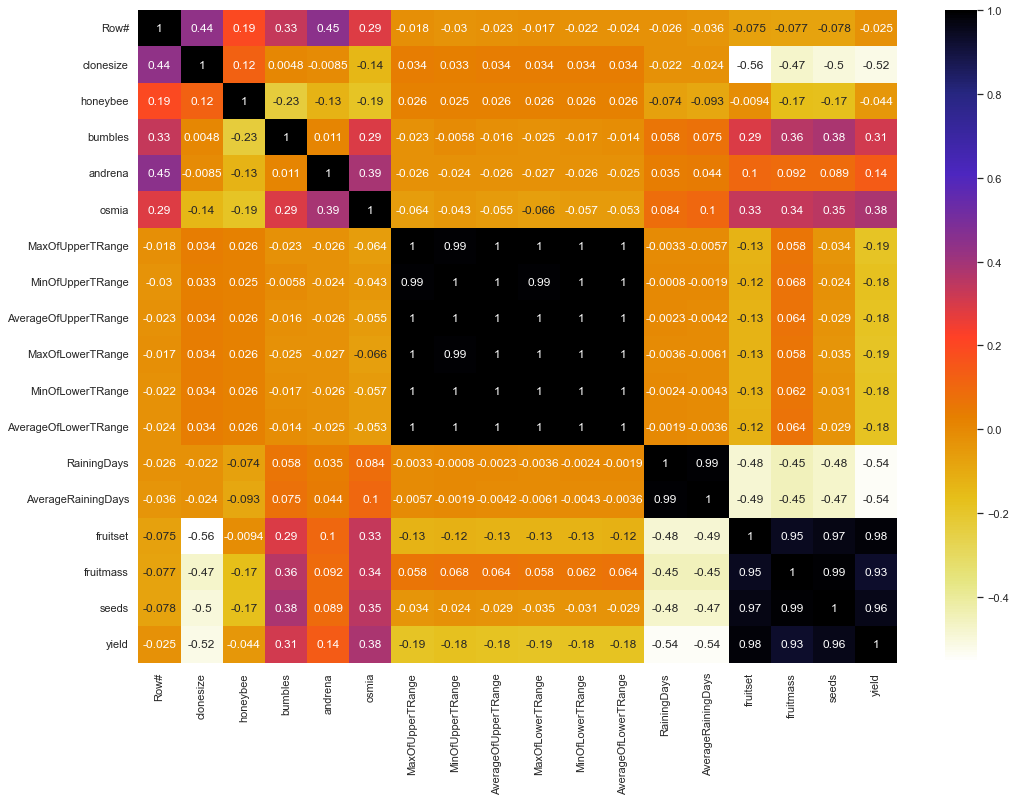

In [273]:
plt.figure(figsize=(17,12))
sns.set()
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [274]:
labels_to_drop=['fruitmass','seeds','AverageRainingDays','MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange','Row#']
df.drop(labels=labels_to_drop,axis='columns' , inplace=True)


<AxesSubplot:>

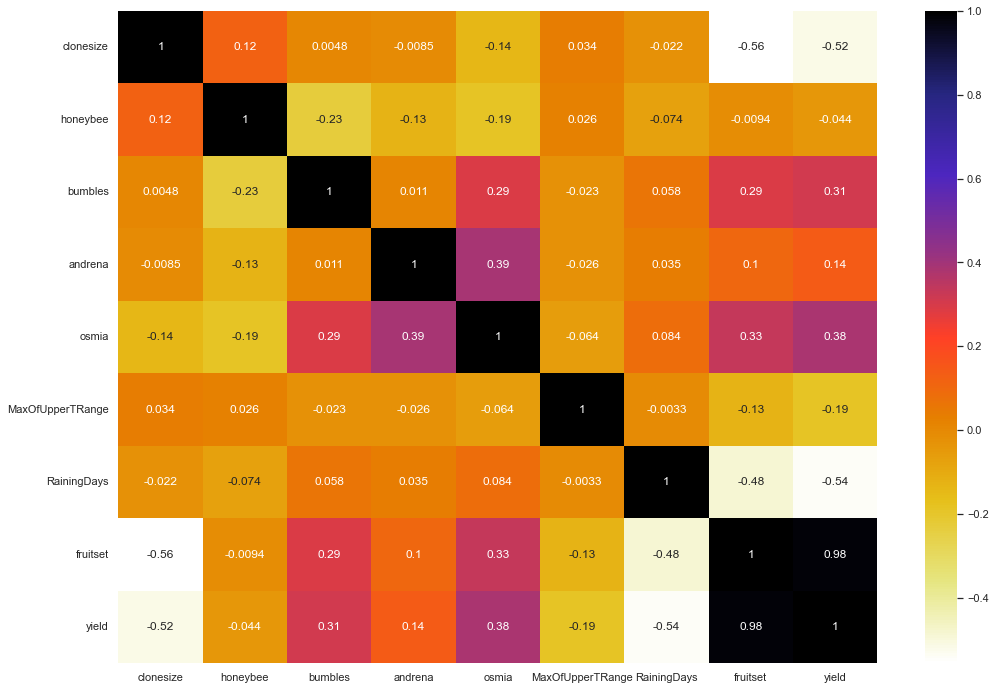

In [275]:
plt.figure(figsize=(17,12))
sns.set()
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [276]:
df.shape

(777, 9)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   clonesize         777 non-null    float64
 1   honeybee          777 non-null    float64
 2   bumbles           777 non-null    float64
 3   andrena           777 non-null    float64
 4   osmia             777 non-null    float64
 5   MaxOfUpperTRange  777 non-null    float64
 6   RainingDays       777 non-null    float64
 7   fruitset          777 non-null    float64
 8   yield             777 non-null    float64
dtypes: float64(9)
memory usage: 54.8 KB


In [278]:
df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,yield
count,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,18.77,0.42,0.28,0.47,0.56,82.28,18.31,0.50,6012.85
std,7.00,0.98,0.07,0.16,0.17,9.19,12.12,0.08,1356.96
min,10.00,0.00,0.00,0.00,0.00,69.70,1.00,0.19,1637.70
25%,12.50,0.25,0.25,0.38,0.50,77.40,3.77,0.45,5124.85
50%,12.50,0.25,0.25,0.50,0.63,86.00,16.00,0.51,6107.38
75%,25.00,0.50,0.38,0.63,0.75,89.00,24.00,0.56,7022.19
max,40.00,18.43,0.58,0.75,0.75,94.60,34.00,0.65,8969.40


## Uni-Variate Analysis

Plotting Box-Plot and Distribution for each Col left

<AxesSubplot:>

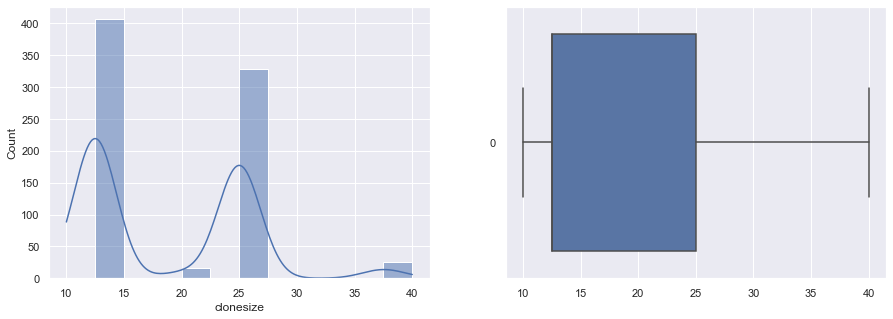

In [279]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(ax= axes[0] , data=df.clonesize , kde=True) 
sns.boxplot(ax= axes[1] , data=df.clonesize ,  orient="h" ) 

<AxesSubplot:>

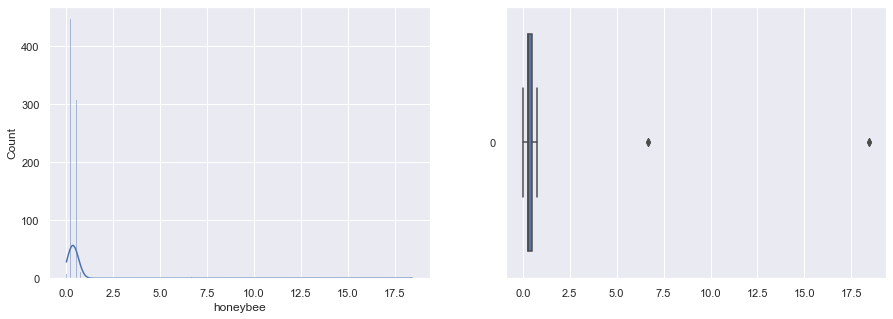

In [280]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(ax= axes[0] , data=df.honeybee , kde=True) 
sns.boxplot(ax= axes[1] , data=df.honeybee ,  orient="h" ) 

<AxesSubplot:>

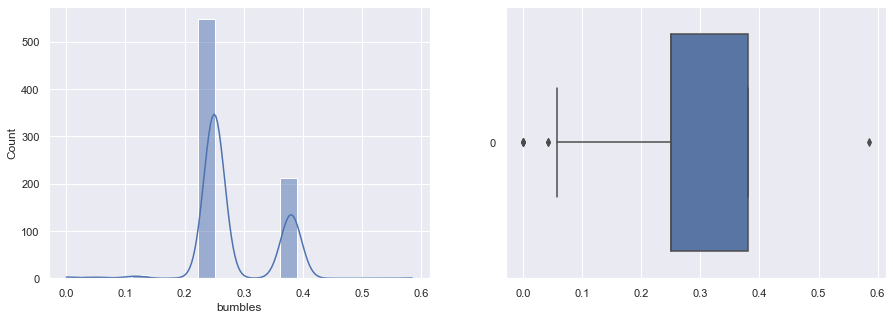

In [281]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(ax= axes[0] , data=df.bumbles , kde=True) 
sns.boxplot(ax= axes[1] , data=df.bumbles ,  orient="h" ) 

<AxesSubplot:>

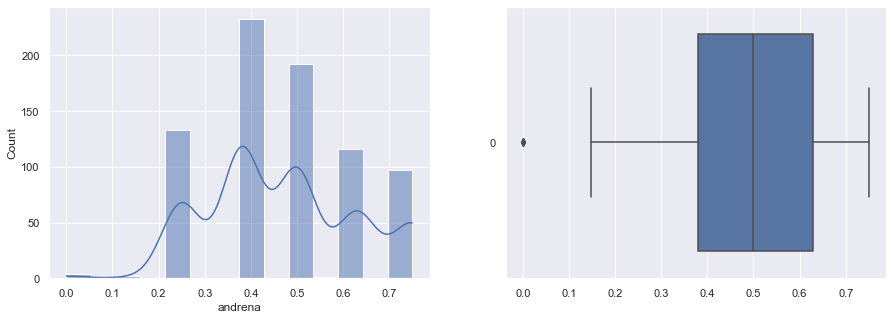

In [282]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(ax= axes[0] , data=df.andrena , kde=True) 
sns.boxplot(ax= axes[1] , data=df.andrena ,  orient="h" ) 

<AxesSubplot:>

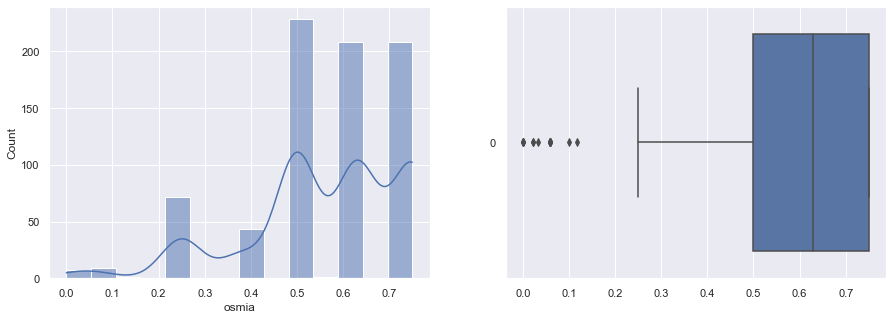

In [283]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(ax= axes[0] , data=df.osmia , kde=True) 
sns.boxplot(ax= axes[1] , data=df.osmia ,  orient="h" ) 


<AxesSubplot:>

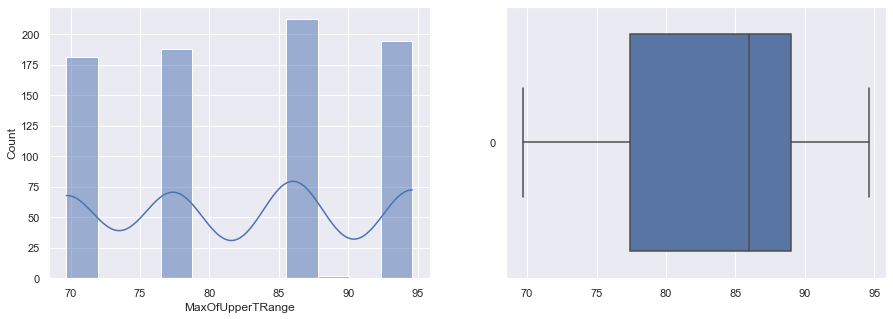

In [284]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(ax= axes[0] , data=df.MaxOfUpperTRange , kde=True) 
sns.boxplot(ax= axes[1] , data=df.MaxOfUpperTRange,  orient="h" ) 

<AxesSubplot:>

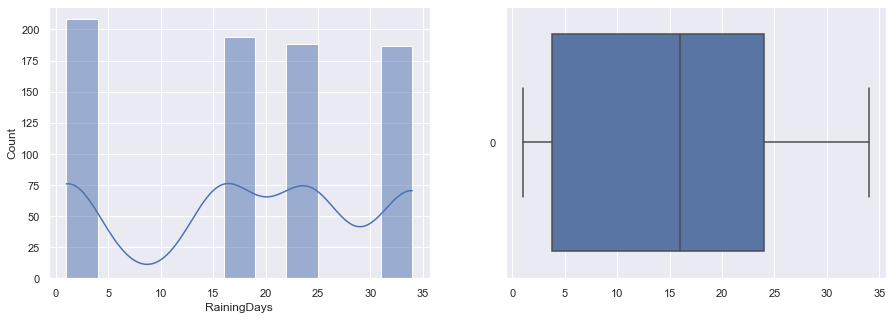

In [285]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(ax= axes[0] , data=df.RainingDays , kde=True) 
sns.boxplot(ax= axes[1] , data=df.RainingDays ,  orient="h" ) 


<AxesSubplot:>

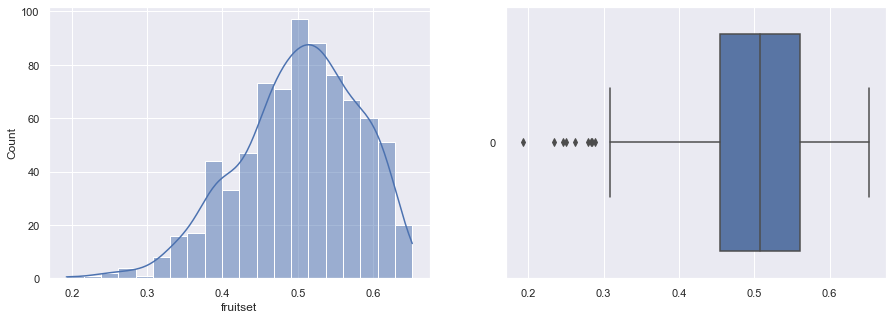

In [286]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(ax= axes[0] , data=df.fruitset , kde=True) 
sns.boxplot(ax= axes[1] , data=df.fruitset ,  orient="h" ) 

<AxesSubplot:>

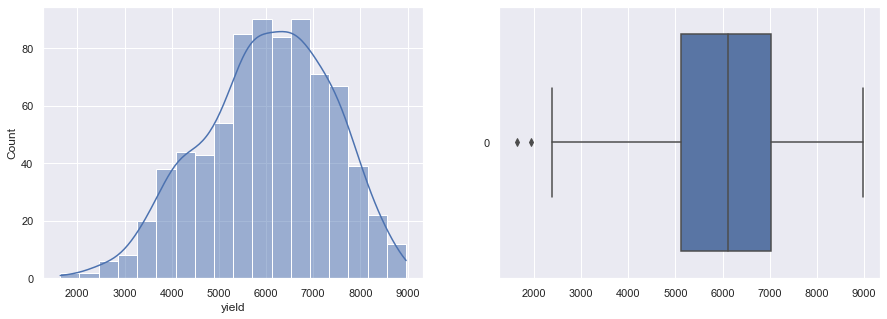

In [287]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(ax= axes[0] , data=df['yield'] , kde=True) 
sns.boxplot(ax= axes[1] , data=df['yield'] ,  orient="h" ) 

## Preprocessing : Standard Scaling

In [288]:
#Splitting Dataset
y = df['yield']
X = df.drop(labels=['yield'] , axis=1)

In [289]:
y.shape

(777,)

In [290]:
X

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset
0,37.50,0.75,0.25,0.25,0.25,86.00,16.00,0.41
1,37.50,0.75,0.25,0.25,0.25,86.00,1.00,0.44
2,37.50,0.75,0.25,0.25,0.25,94.60,16.00,0.38
3,37.50,0.75,0.25,0.25,0.25,94.60,1.00,0.41
4,37.50,0.75,0.25,0.25,0.25,86.00,24.00,0.35
...,...,...,...,...,...,...,...,...
772,10.00,0.54,0.12,0.41,0.06,86.00,3.77,0.49
773,40.00,0.54,0.12,0.41,0.06,86.00,3.77,0.34
774,20.00,0.54,0.12,0.41,0.06,86.00,24.00,0.40
775,20.00,0.54,0.12,0.41,0.06,89.00,3.77,0.40


In [291]:
sc = preprocessing.StandardScaler()
X  = sc.fit_transform(X=X)

In [321]:
# X = df.copy()
df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'RainingDays', 'fruitset', 'yield'],
      dtype='object')

## Test Train Split

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [294]:
print('X_train :' , X_train.shape)
print('X_test  :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test  :', y_test.shape)

X_train : (543, 8)
X_test  : (234, 8)
y_train : (543,)
y_test  : (234,)


In [295]:
X_train

array([[-0.89608189, -0.17084438, -0.4885117 , ...,  1.34122131,
        -1.42858123,  1.01813619],
       [-0.89608189, -0.17084438, -0.4885117 , ...,  0.40520015,
         1.29499523, -0.83320441],
       [ 0.89102188,  0.08470783, -0.4885117 , ...,  1.34122131,
         0.46966903, -1.73257211],
       ...,
       [-0.89608189, -0.17084438, -0.4885117 , ...,  0.40520015,
         1.29499523, -1.08130707],
       [-0.89608189, -0.17084438, -0.4885117 , ..., -0.53082102,
        -0.19059193,  1.09813736],
       [ 0.89102188, -0.17084438, -0.4885117 , ..., -0.53082102,
         0.46966903, -0.95795756]])

# Modelling

Using lazyRegressor 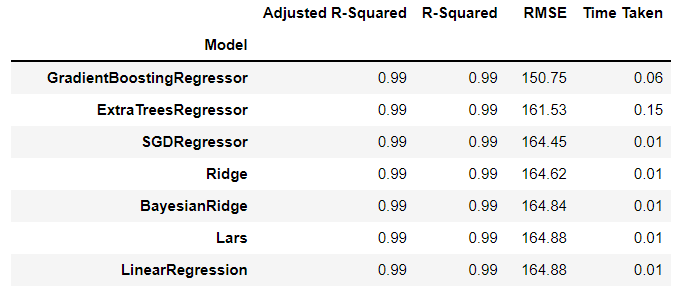

In [296]:
from lazypredict.Supervised import LazyRegressor, LazyClassifier
# LazyClassifier Instance and fiting data
regs= LazyRegressor(ignore_warnings=True)
models, predictions = regs.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 20.78it/s]


In [297]:
models.sort_values(by='RMSE' ,na_position='last')

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.99,0.99,150.75,0.06
ExtraTreesRegressor,0.99,0.99,161.53,0.15
SGDRegressor,0.99,0.99,164.45,0.01
Ridge,0.99,0.99,164.62,0.01
BayesianRidge,0.99,0.99,164.84,0.01
LinearRegression,0.99,0.99,164.88,0.01
TransformedTargetRegressor,0.99,0.99,164.88,0.01
Lars,0.99,0.99,164.88,0.01
RANSACRegressor,0.99,0.99,164.92,0.01


In [298]:
AdaBR = AdaBoostRegressor()

AdaBR.fit(X_train, y_train)

yhat = AdaBR.predict(X_test)

mae_linear1 = mean_absolute_error(y_test, yhat)
mse_linear1 = mean_squared_error(y_test, yhat)
rmse_linear1 = np.sqrt(mse_linear)
rsq_linear1 = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_linear1)
print('MSE: %.3f' % mse_linear1)
print('RMSE: %.3f' % rmse_linear1)
print('R-Square: %.3f' % rsq_linear1)

MAE: 179.215
MSE: 54314.580
RMSE: 2.340
R-Square: 0.972


In [299]:
SGDR = SGDRegressor()

SGDR.fit(X_train, y_train)

yhat = SGDR.predict(X_test)

mae_linear2 = mean_absolute_error(y_test, yhat)
mse_linear2 = mean_squared_error(y_test, yhat)
rmse_linear2 = np.sqrt(mse_linear)
rsq_linear2 = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_linear2)
print('MSE: %.3f' % mse_linear2)
print('RMSE: %.3f' % rmse_linear2)
print('R-Square: %.3f' % rsq_linear2)

MAE: 127.649
MSE: 26963.691
RMSE: 2.340
R-Square: 0.986


In [300]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
yhat = rf.predict(X_test)

mae_linear4 = mean_absolute_error(y_test, yhat)
mse_linear4 = mean_squared_error(y_test, yhat)
rmse_linear4 = np.sqrt(mse_linear)
rsq_linear4 = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_linear4)
print('MSE: %.3f' % mse_linear4)
print('RMSE: %.3f' % rmse_linear4)
print('R-Square: %.3f' % rsq_linear4)

MAE: 129.368
MSE: 35536.988
RMSE: 2.340
R-Square: 0.982


In [301]:
data = [[mae_linear1,mse_linear1,rmse_linear1,rsq_linear1,'AdaBoost'] , 
        [mae_linear2,mse_linear2,rmse_linear2,rsq_linear2,'SGDRegressor'] , 
        [mae_linear3,mse_linear3,rmse_linear3,rsq_linear3,'RidgeCV'] , 
        [mae_linear4,mse_linear4,rmse_linear4,rsq_linear4,'RandomForestRegressor']]

In [302]:
df_metrics = pd.DataFrame(data, columns=['mae', 'mse' ,'rmse','rsq','Reg-Type'])

In [303]:
RidgeR = RidgeCV()

RidgeR.fit(X_train, y_train)

yhat = RidgeR.predict(X_test)

mae_linear3 = mean_absolute_error(y_test, yhat)
mse_linear3 = mean_squared_error(y_test, yhat)
rmse_linear3 = np.sqrt(mse_linear)
rsq_linear3 = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_linear3)
print('MSE: %.3f' % mse_linear3)
print('RMSE: %.3f' % rmse_linear3)
print('R-Square: %.3f' % rsq_linear3)

MAE: 132.871
MSE: 27492.149
RMSE: 2.340
R-Square: 0.986


In [304]:
df_metrics

,mae,mse,rmse,rsq,Reg-Type
0,179.21,54314.58,2.34,0.97,AdaBoost
1,127.65,26963.69,2.34,0.99,SGDRegressor
2,1.81,5.47,2.34,1.00,RidgeCV
3,129.37,35536.99,2.34,0.98,RandomForestRegressor


# Model Explainability (Explainable AI)

we have two models `RF1` and `best_model_v0` which is random forest and xgboost trained on the test set. we will visualize the model behavior and explainability.

[Shap Tree Explainer](https://shap.readthedocs.io/en/stable/example_notebooks/tabular_examples/tree_based_models/Fitting%20a%20Linear%20Simulation%20with%20XGBoost.html) has the code docs

In [331]:
print(mean_absolute_error(y_test, yhat))
print(np.sqrt(mean_squared_error(y_test, yhat)))

132.87081910222454
165.80756679108114


In [332]:
X_test

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset
0,-0.90,-0.17,1.47,-0.55,0.40,1.34,-1.43,1.58
1,0.89,0.08,-0.49,-0.55,1.11,1.34,-0.19,-0.23
2,0.89,0.08,1.47,-0.55,0.40,-0.53,1.29,0.16
3,0.89,0.08,1.47,0.19,0.40,1.34,1.29,-1.34
4,-0.90,-0.17,1.47,0.19,-0.37,-0.53,-1.43,1.62
...,...,...,...,...,...,...,...,...
229,-0.90,-0.17,-0.49,0.19,1.11,1.34,-0.19,1.17
230,-0.90,-0.17,1.47,0.19,1.11,0.41,-0.19,1.65
231,0.89,0.08,1.47,-0.55,-0.37,-0.53,-0.19,0.40
232,0.89,0.08,-0.49,1.00,-0.37,1.34,1.29,-2.19


In [333]:
X_test = pd.DataFrame(X_test, columns = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'RainingDays', 'fruitset'])

In [334]:
#Inverse Transforming the X_Test for the EXplainable AI with RIDGE_REGRESSION

sc.inverse_transform(X_test)

array([[12.5       ,  0.25      ,  0.38      , ..., 94.6       ,
         1.        ,  0.62785767],
       [25.        ,  0.5       ,  0.25      , ..., 94.6       ,
        16.        ,  0.48380557],
       [25.        ,  0.5       ,  0.38      , ..., 77.4       ,
        34.        ,  0.51501262],
       ...,
       [25.        ,  0.5       ,  0.38      , ..., 77.4       ,
        16.        ,  0.5342517 ],
       [25.        ,  0.5       ,  0.25      , ..., 94.6       ,
        34.        ,  0.32833671],
       [37.5       ,  0.25      ,  0.25      , ..., 86.        ,
        16.        ,  0.39897696]])

In [335]:
y_test

374   8211.08
491   5632.46
678   5966.71
720   4201.44
412   8538.46
        ...  
245   7483.74
435   8318.80
657   6503.27
560   3447.08
11    3941.26
Name: yield, Length: 234, dtype: float64

In [336]:
#MODEL
RidgeR.get_params()

{'alphas': array([ 0.1,  1. , 10. ]),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': False,
 'scoring': None,
 'store_cv_values': False}

In [337]:
model = rf

In [338]:
X_test

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset
0,-0.90,-0.17,1.47,-0.55,0.40,1.34,-1.43,1.58
1,0.89,0.08,-0.49,-0.55,1.11,1.34,-0.19,-0.23
2,0.89,0.08,1.47,-0.55,0.40,-0.53,1.29,0.16
3,0.89,0.08,1.47,0.19,0.40,1.34,1.29,-1.34
4,-0.90,-0.17,1.47,0.19,-0.37,-0.53,-1.43,1.62
...,...,...,...,...,...,...,...,...
229,-0.90,-0.17,-0.49,0.19,1.11,1.34,-0.19,1.17
230,-0.90,-0.17,1.47,0.19,1.11,0.41,-0.19,1.65
231,0.89,0.08,1.47,-0.55,-0.37,-0.53,-0.19,0.40
232,0.89,0.08,-0.49,1.00,-0.37,1.34,1.29,-2.19


In [350]:
sample_set = X_test
shap_values = shap.TreeExplainer(model).shap_values(sample_set)

In [351]:
X_test.shape

(234, 8)

In [352]:
shap.initjs()

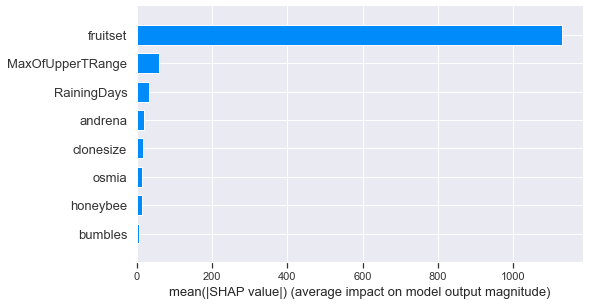

In [353]:
shap.summary_plot(shap_values, sample_set, plot_type="bar")

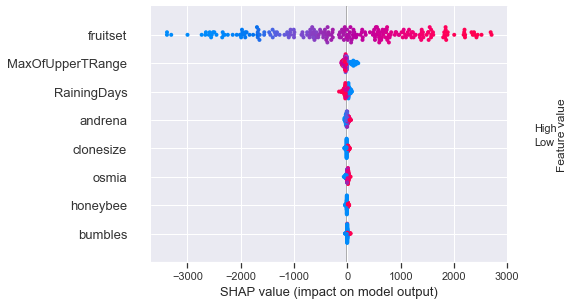

In [354]:
shap.summary_plot(shap_values, sample_set)

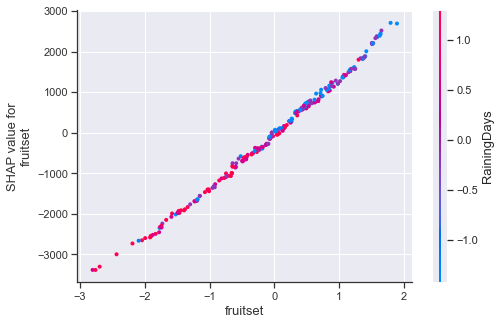

In [359]:
shap.dependence_plot('fruitset', shap_values, sample_set)

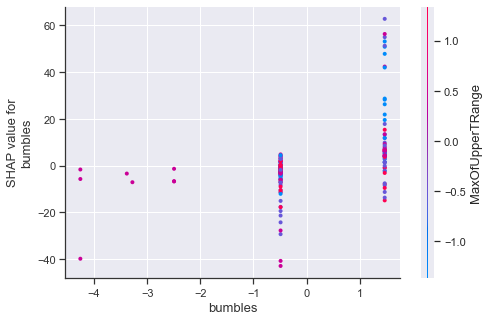

In [361]:
shap.dependence_plot('bumbles', shap_values, sample_set)

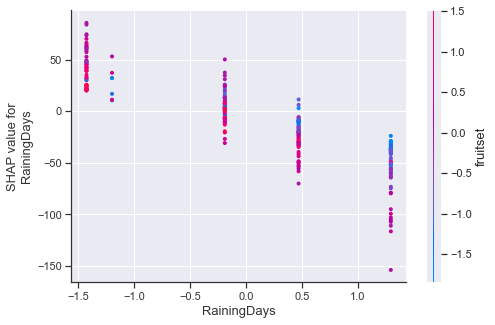

In [362]:
shap.dependence_plot('RainingDays', shap_values, sample_set)